<a href="https://colab.research.google.com/github/Rhodham96/GANs_CGANs/blob/main/notebooks/GANS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GANs - Generative Adversarial Networks

In [2]:
import numpy as np
import torch
import torch.nn as nn
import torchvision
import torchvision.datasets as datasets
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import torchvision.utils as vutils
import os
print(torch.__version__)

2.6.0+cu124


In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [4]:
class AddGaussianNoise(object):
    def __init__(self, mean=0., std=1.):
        self.std = std
        self.mean = mean

    def __call__(self, tensor):
        return tensor + torch.randn(tensor.size()) * self.std + self.mean

    def __repr__(self):
        return self.__class__.__name__ + '(mean={0}, std={1})'.format(self.mean, self.std)

In [5]:
transform = transforms.Compose([
    transforms.ToTensor(),
    AddGaussianNoise(0., 0.1)
    #transforms.Normalize((0.5,), (0.5,)) # -> it is already normalized
])
# import a few images (MNIST Dataset)
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

print(f"mnist_trainset = {len(mnist_trainset)}")
print(f"mnist_testset = {len(mnist_testset)}")

100%|██████████| 9.91M/9.91M [00:00<00:00, 54.1MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 3.36MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 13.2MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 7.86MB/s]


mnist_trainset = 60000
mnist_testset = 10000


In [6]:
type(mnist_trainset[0])

tuple

In [7]:
train_image_zero, train_target_zero = mnist_trainset[0]

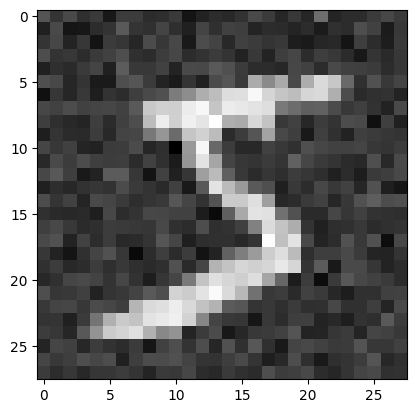

In [8]:
plt.imshow(train_image_zero.squeeze().numpy(), cmap="gray")

In [11]:
class Generator(nn.Module):
  def __init__(self, noise_dim=100, image_dim=784):
    super(Generator, self).__init__()
    self.net = nn.Sequential(
        nn.Linear(noise_dim, 256),
        nn.ReLU(inplace=True),
        nn.Linear(256, 512),
        nn.ReLU(inplace=True),
        nn.Linear(512, image_dim),
        nn.Tanh()
    )
  def forward(self,x):
    return self.net(x)



In [12]:
class Discriminator(nn.Module):
  def __init__(self, image_dim=784):
    super(Discriminator, self).__init__()
    self.net = nn.Sequential(
        nn.Linear(image_dim, 256),
        nn.LeakyReLU(0.2,inplace=True),
        nn.Linear(256, 128),
        nn.LeakyReLU(0.2,inplace=True),
        nn.Linear(128,1)
    )
  def forward(self, x):
    return self.net(x)


In [13]:
def weights_init_generator(m):
    if isinstance(m, nn.Linear):
        if isinstance(m, nn.Sequential): return
        nn.init.xavier_normal_(m.weight)
        if m.bias is not None:
            nn.init.constant_(m.bias, 0)

def weights_init_discriminator(m):
    if isinstance(m, nn.Linear):
        if isinstance(m, nn.Sequential): return
        nn.init.kaiming_normal_(m.weight)
        if m.bias is not None:
            nn.init.constant_(m.bias, 0)

In [14]:
generator = Generator()
generator.to(device)
generator.apply(weights_init_generator)
generator = torch.compile(generator)
discriminator = Discriminator()
discriminator.to(device)
discriminator.apply(weights_init_discriminator)
discriminator = torch.compile(discriminator)

# generate a batch of fake images to see if sizes are ok
z = torch.randn(16,100).to(device)
fake_images = generator(z)
preds = discriminator(fake_images)
print(fake_images.shape, preds.shape)


No CUDA runtime is found, using CUDA_HOME='/usr/local/cuda'


torch.Size([16, 784]) torch.Size([16, 1])


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


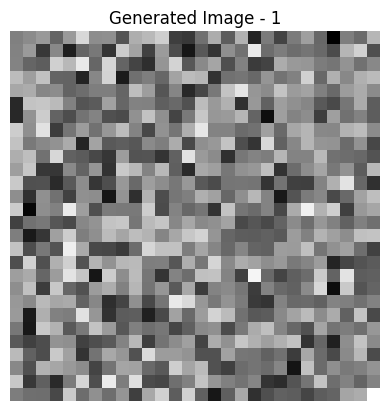

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch [1/150] | D Loss: 0.8251 | G Loss: 1.8954 | D steps: 3, G steps: 1


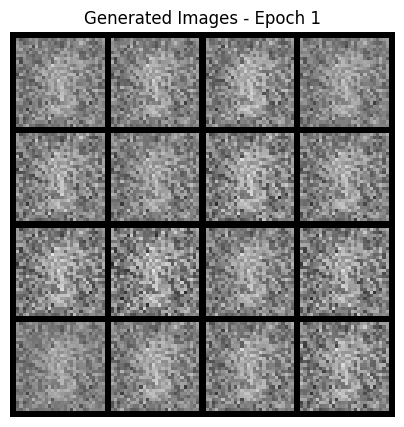

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch [2/150] | D Loss: 0.7902 | G Loss: 1.9087 | D steps: 1, G steps: 1
Epoch [3/150] | D Loss: 0.7991 | G Loss: 1.7610 | D steps: 1, G steps: 1
Epoch [4/150] | D Loss: 0.9197 | G Loss: 1.5706 | D steps: 1, G steps: 1
Epoch [5/150] | D Loss: 0.9261 | G Loss: 1.4848 | D steps: 1, G steps: 1
Epoch [6/150] | D Loss: 0.9730 | G Loss: 1.8091 | D steps: 1, G steps: 1
Epoch [7/150] | D Loss: 0.9776 | G Loss: 1.6248 | D steps: 1, G steps: 1
Epoch [8/150] | D Loss: 0.8890 | G Loss: 1.6137 | D steps: 1, G steps: 1
Epoch [9/150] | D Loss: 0.8973 | G Loss: 1.6387 | D steps: 1, G steps: 1
Epoch [10/150] | D Loss: 0.9967 | G Loss: 1.5932 | D steps: 1, G steps: 1


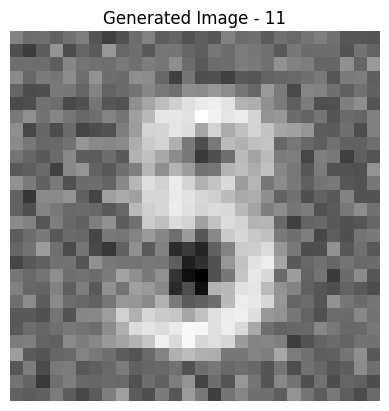

Epoch [11/150] | D Loss: 0.9548 | G Loss: 1.7472 | D steps: 1, G steps: 1


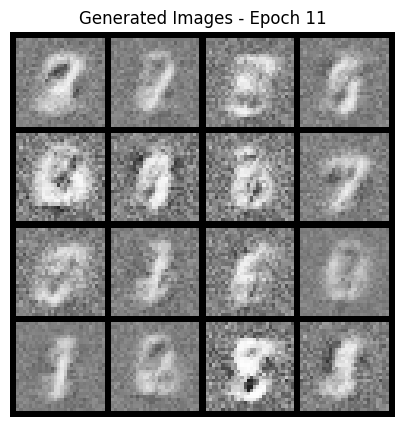

Epoch [12/150] | D Loss: 0.9723 | G Loss: 1.6918 | D steps: 1, G steps: 1
Epoch [13/150] | D Loss: 1.0597 | G Loss: 1.7747 | D steps: 1, G steps: 1
Epoch [14/150] | D Loss: 0.9212 | G Loss: 1.7691 | D steps: 3, G steps: 1
Epoch [15/150] | D Loss: 0.9519 | G Loss: 1.6774 | D steps: 1, G steps: 1
Epoch [16/150] | D Loss: 1.0410 | G Loss: 1.4034 | D steps: 1, G steps: 1
Epoch [17/150] | D Loss: 0.9224 | G Loss: 1.9137 | D steps: 3, G steps: 1
Epoch [18/150] | D Loss: 0.9131 | G Loss: 1.7453 | D steps: 1, G steps: 1
Epoch [19/150] | D Loss: 1.1187 | G Loss: 1.3076 | D steps: 1, G steps: 1
Epoch [20/150] | D Loss: 0.8966 | G Loss: 1.4969 | D steps: 3, G steps: 1


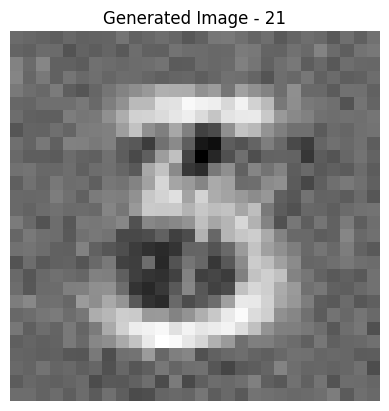

Epoch [21/150] | D Loss: 1.1526 | G Loss: 1.1844 | D steps: 1, G steps: 1


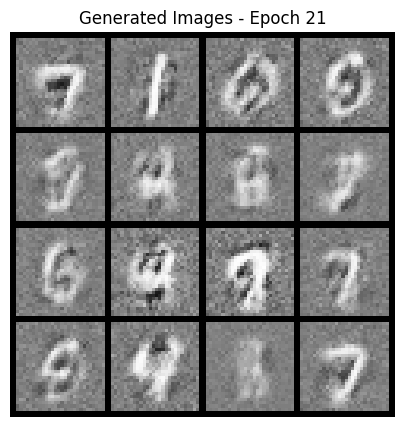

Epoch [22/150] | D Loss: 0.8988 | G Loss: 1.3937 | D steps: 3, G steps: 1
Epoch [23/150] | D Loss: 1.0542 | G Loss: 1.3172 | D steps: 1, G steps: 1
Epoch [24/150] | D Loss: 0.8549 | G Loss: 1.6416 | D steps: 3, G steps: 1
Epoch [25/150] | D Loss: 1.0746 | G Loss: 1.4022 | D steps: 1, G steps: 1
Epoch [26/150] | D Loss: 0.9414 | G Loss: 1.7488 | D steps: 3, G steps: 1
Epoch [27/150] | D Loss: 1.1675 | G Loss: 1.3058 | D steps: 1, G steps: 1
Epoch [28/150] | D Loss: 1.0063 | G Loss: 1.4965 | D steps: 3, G steps: 1
Epoch [29/150] | D Loss: 0.9811 | G Loss: 1.7584 | D steps: 3, G steps: 1
Epoch [30/150] | D Loss: 1.1568 | G Loss: 1.3122 | D steps: 1, G steps: 1


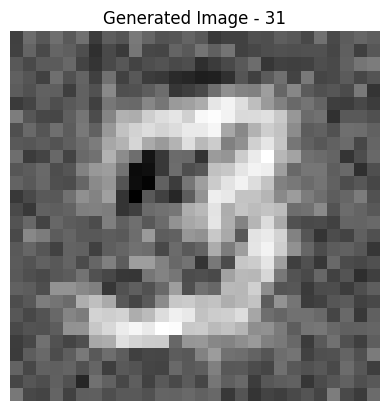

Epoch [31/150] | D Loss: 0.9524 | G Loss: 1.5589 | D steps: 3, G steps: 1


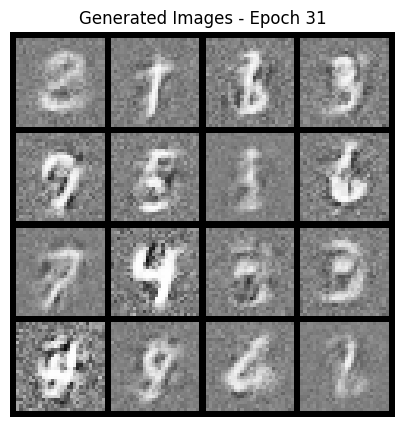

Epoch [32/150] | D Loss: 1.0232 | G Loss: 1.5351 | D steps: 1, G steps: 1
Epoch [33/150] | D Loss: 0.9752 | G Loss: 1.5020 | D steps: 3, G steps: 1
Epoch [34/150] | D Loss: 1.1724 | G Loss: 1.1089 | D steps: 1, G steps: 1
Epoch [35/150] | D Loss: 0.9695 | G Loss: 1.4895 | D steps: 3, G steps: 1
Epoch [36/150] | D Loss: 1.1586 | G Loss: 1.3516 | D steps: 1, G steps: 1
Epoch [37/150] | D Loss: 0.9555 | G Loss: 1.4725 | D steps: 3, G steps: 1
Epoch [38/150] | D Loss: 1.2061 | G Loss: 1.1285 | D steps: 1, G steps: 1
Epoch [39/150] | D Loss: 0.9221 | G Loss: 1.3986 | D steps: 3, G steps: 1
Epoch [40/150] | D Loss: 1.1414 | G Loss: 1.0989 | D steps: 1, G steps: 1


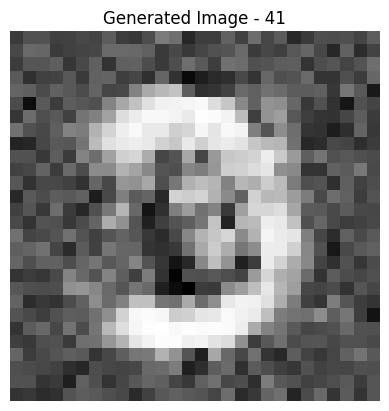

Epoch [41/150] | D Loss: 0.9272 | G Loss: 1.3859 | D steps: 3, G steps: 1


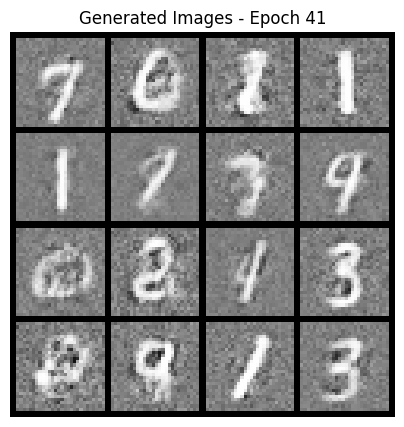

Epoch [42/150] | D Loss: 1.1805 | G Loss: 1.2031 | D steps: 1, G steps: 1
Epoch [43/150] | D Loss: 1.0540 | G Loss: 1.2506 | D steps: 3, G steps: 1
Epoch [44/150] | D Loss: 1.0673 | G Loss: 1.6382 | D steps: 3, G steps: 1
Epoch [45/150] | D Loss: 0.8500 | G Loss: 1.5157 | D steps: 3, G steps: 1
Epoch [46/150] | D Loss: 1.0860 | G Loss: 1.2445 | D steps: 1, G steps: 1
Epoch [47/150] | D Loss: 0.9754 | G Loss: 1.5466 | D steps: 3, G steps: 1
Epoch [48/150] | D Loss: 1.1189 | G Loss: 1.4537 | D steps: 1, G steps: 1
Epoch [49/150] | D Loss: 0.9639 | G Loss: 1.6271 | D steps: 3, G steps: 1
Epoch [50/150] | D Loss: 1.2260 | G Loss: 1.1297 | D steps: 1, G steps: 1


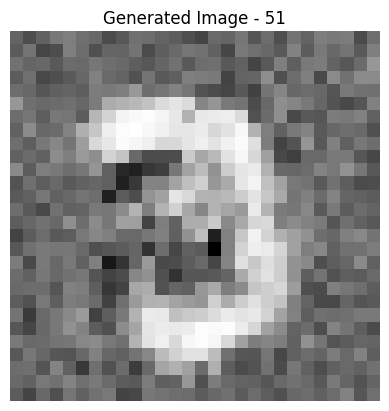

Epoch [51/150] | D Loss: 1.0278 | G Loss: 1.3526 | D steps: 3, G steps: 1


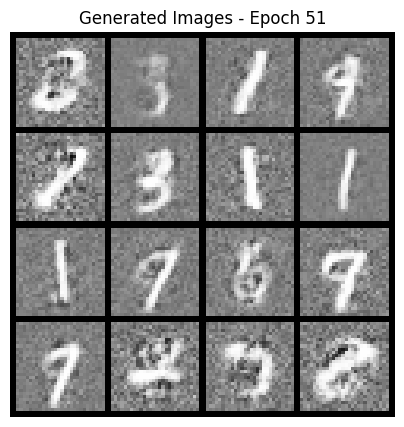

Epoch [52/150] | D Loss: 0.9144 | G Loss: 1.4354 | D steps: 3, G steps: 1
Epoch [53/150] | D Loss: 1.2551 | G Loss: 1.2654 | D steps: 1, G steps: 1
Epoch [54/150] | D Loss: 1.0345 | G Loss: 1.3320 | D steps: 3, G steps: 1
Epoch [55/150] | D Loss: 0.9806 | G Loss: 1.4829 | D steps: 3, G steps: 1
Epoch [56/150] | D Loss: 1.1708 | G Loss: 1.3351 | D steps: 1, G steps: 1
Epoch [57/150] | D Loss: 1.0933 | G Loss: 1.2654 | D steps: 3, G steps: 1
Epoch [58/150] | D Loss: 1.0371 | G Loss: 1.2645 | D steps: 3, G steps: 1
Epoch [59/150] | D Loss: 1.0364 | G Loss: 1.6311 | D steps: 3, G steps: 1
Epoch [60/150] | D Loss: 1.0320 | G Loss: 1.3654 | D steps: 3, G steps: 1


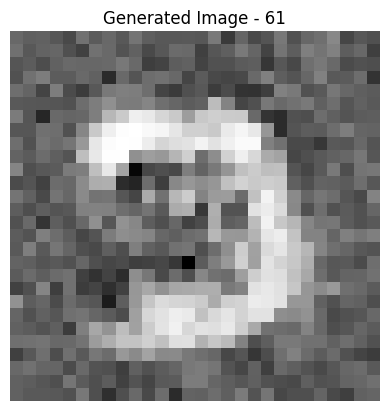

Epoch [61/150] | D Loss: 1.0389 | G Loss: 1.5481 | D steps: 3, G steps: 1


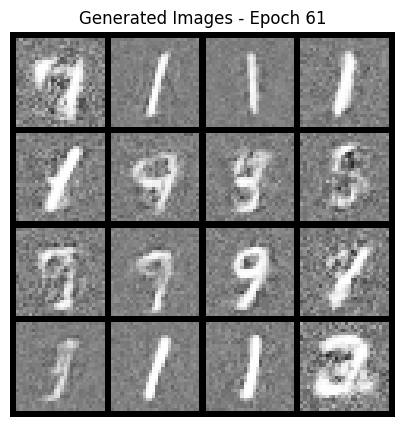

Epoch [62/150] | D Loss: 1.1396 | G Loss: 1.2608 | D steps: 3, G steps: 1
Epoch [63/150] | D Loss: 1.0422 | G Loss: 1.3280 | D steps: 3, G steps: 1
Epoch [64/150] | D Loss: 1.0139 | G Loss: 1.1978 | D steps: 3, G steps: 1
Epoch [65/150] | D Loss: 1.1184 | G Loss: 1.3139 | D steps: 3, G steps: 1
Epoch [66/150] | D Loss: 1.0877 | G Loss: 1.2823 | D steps: 3, G steps: 1
Epoch [67/150] | D Loss: 1.0258 | G Loss: 1.2565 | D steps: 3, G steps: 1
Epoch [68/150] | D Loss: 1.0146 | G Loss: 1.2485 | D steps: 3, G steps: 1
Epoch [69/150] | D Loss: 1.0638 | G Loss: 1.2957 | D steps: 3, G steps: 1
Epoch [70/150] | D Loss: 1.0896 | G Loss: 1.3292 | D steps: 3, G steps: 1


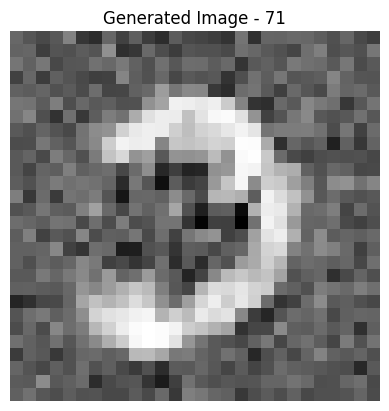

Epoch [71/150] | D Loss: 1.1350 | G Loss: 1.2689 | D steps: 3, G steps: 1


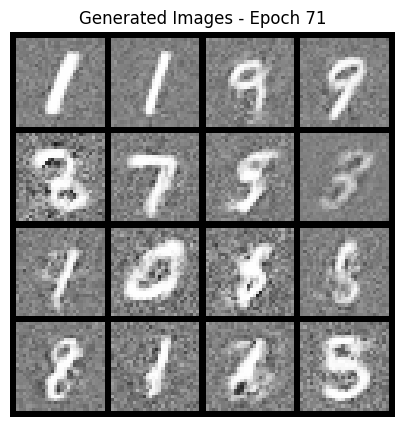

Epoch [72/150] | D Loss: 1.1138 | G Loss: 1.0612 | D steps: 3, G steps: 1
Epoch [73/150] | D Loss: 0.9864 | G Loss: 1.3157 | D steps: 3, G steps: 1
Epoch [74/150] | D Loss: 1.2597 | G Loss: 1.2167 | D steps: 1, G steps: 1
Epoch [75/150] | D Loss: 0.9672 | G Loss: 1.2972 | D steps: 3, G steps: 1
Epoch [76/150] | D Loss: 1.1492 | G Loss: 1.0059 | D steps: 1, G steps: 1
Epoch [77/150] | D Loss: 1.1074 | G Loss: 1.1940 | D steps: 3, G steps: 1
Epoch [78/150] | D Loss: 0.9957 | G Loss: 1.3221 | D steps: 3, G steps: 1
Epoch [79/150] | D Loss: 1.1491 | G Loss: 1.1247 | D steps: 1, G steps: 1
Epoch [80/150] | D Loss: 1.1002 | G Loss: 1.1753 | D steps: 3, G steps: 1


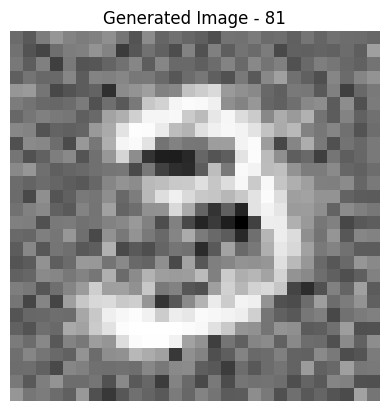

Epoch [81/150] | D Loss: 1.0402 | G Loss: 1.2335 | D steps: 3, G steps: 1


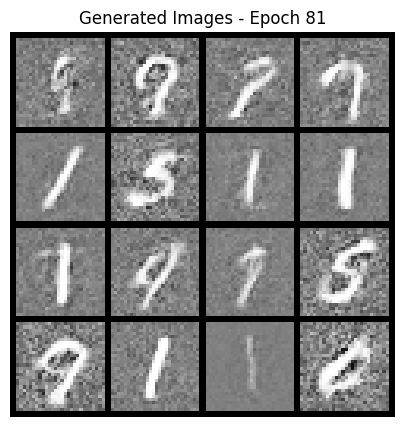

Epoch [82/150] | D Loss: 1.0292 | G Loss: 1.2116 | D steps: 3, G steps: 1
Epoch [83/150] | D Loss: 1.0871 | G Loss: 1.4764 | D steps: 3, G steps: 1
Epoch [84/150] | D Loss: 1.0643 | G Loss: 1.4847 | D steps: 3, G steps: 1
Epoch [85/150] | D Loss: 1.1520 | G Loss: 1.2910 | D steps: 3, G steps: 1
Epoch [86/150] | D Loss: 1.0023 | G Loss: 1.3146 | D steps: 3, G steps: 1
Epoch [87/150] | D Loss: 1.0422 | G Loss: 1.2210 | D steps: 3, G steps: 1
Epoch [88/150] | D Loss: 1.0252 | G Loss: 1.3665 | D steps: 3, G steps: 1
Epoch [89/150] | D Loss: 1.0486 | G Loss: 1.3366 | D steps: 3, G steps: 1
Epoch [90/150] | D Loss: 1.0355 | G Loss: 1.2370 | D steps: 3, G steps: 1


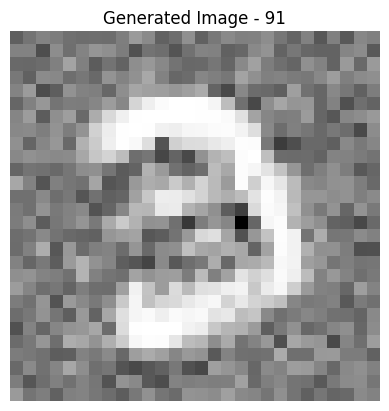

Epoch [91/150] | D Loss: 0.9878 | G Loss: 1.3869 | D steps: 3, G steps: 1


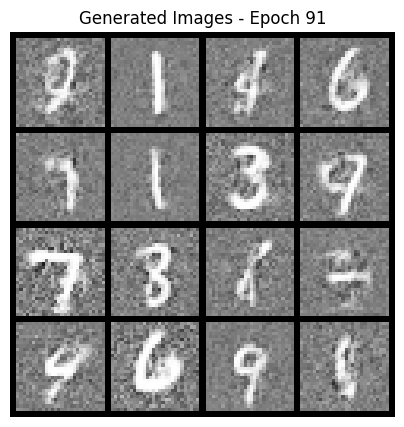

Epoch [92/150] | D Loss: 1.3490 | G Loss: 0.9695 | D steps: 1, G steps: 1
Epoch [93/150] | D Loss: 1.1310 | G Loss: 1.0371 | D steps: 3, G steps: 1
Epoch [94/150] | D Loss: 1.0490 | G Loss: 1.3519 | D steps: 3, G steps: 1
Epoch [95/150] | D Loss: 1.0519 | G Loss: 1.1639 | D steps: 3, G steps: 1
Epoch [96/150] | D Loss: 1.0428 | G Loss: 1.3216 | D steps: 3, G steps: 1
Epoch [97/150] | D Loss: 1.1692 | G Loss: 1.5168 | D steps: 3, G steps: 1
Epoch [98/150] | D Loss: 1.0783 | G Loss: 0.9788 | D steps: 3, G steps: 1
Epoch [99/150] | D Loss: 0.9916 | G Loss: 1.2187 | D steps: 3, G steps: 1
Epoch [100/150] | D Loss: 1.2667 | G Loss: 1.1382 | D steps: 1, G steps: 1


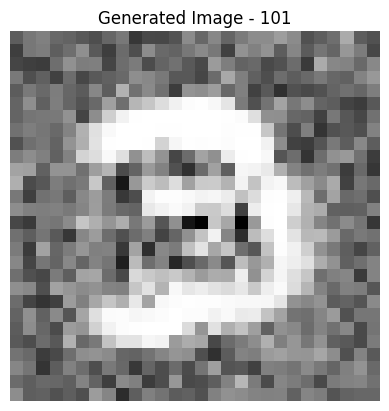

Epoch [101/150] | D Loss: 1.0452 | G Loss: 1.1765 | D steps: 3, G steps: 1


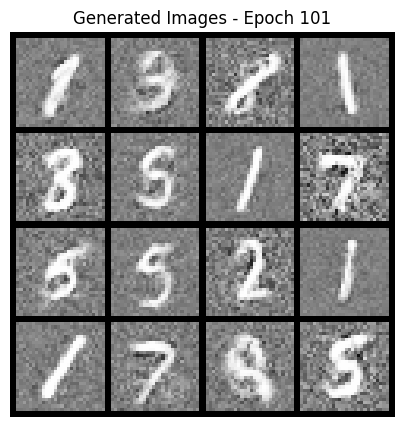

Epoch [102/150] | D Loss: 1.1285 | G Loss: 1.1562 | D steps: 3, G steps: 1
Epoch [103/150] | D Loss: 0.9974 | G Loss: 1.1032 | D steps: 3, G steps: 1
Epoch [104/150] | D Loss: 1.1823 | G Loss: 0.8977 | D steps: 1, G steps: 1
Epoch [105/150] | D Loss: 1.1353 | G Loss: 1.2160 | D steps: 3, G steps: 1
Epoch [106/150] | D Loss: 1.1025 | G Loss: 1.1584 | D steps: 3, G steps: 1
Epoch [107/150] | D Loss: 1.1410 | G Loss: 1.1056 | D steps: 3, G steps: 1
Epoch [108/150] | D Loss: 1.0793 | G Loss: 1.1826 | D steps: 3, G steps: 1
Epoch [109/150] | D Loss: 1.0324 | G Loss: 1.1698 | D steps: 3, G steps: 1
Epoch [110/150] | D Loss: 1.0265 | G Loss: 1.2494 | D steps: 3, G steps: 1


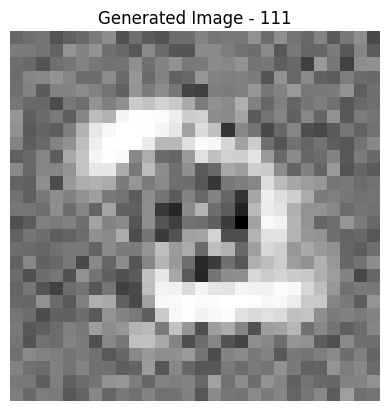

Epoch [111/150] | D Loss: 1.0842 | G Loss: 1.0722 | D steps: 3, G steps: 1


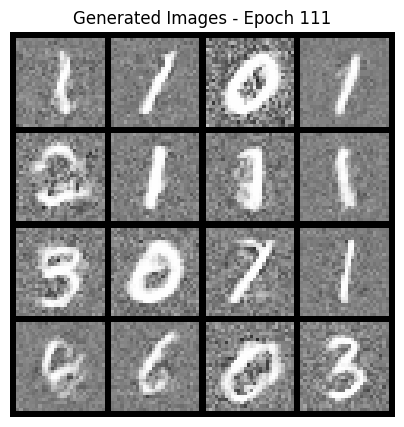

Epoch [112/150] | D Loss: 1.0758 | G Loss: 1.2370 | D steps: 3, G steps: 1
Epoch [113/150] | D Loss: 1.0400 | G Loss: 1.1052 | D steps: 3, G steps: 1
Epoch [114/150] | D Loss: 1.0931 | G Loss: 1.2390 | D steps: 3, G steps: 1
Epoch [115/150] | D Loss: 1.1968 | G Loss: 1.2257 | D steps: 3, G steps: 1
Epoch [116/150] | D Loss: 1.0750 | G Loss: 1.1935 | D steps: 3, G steps: 1
Epoch [117/150] | D Loss: 1.1080 | G Loss: 1.2860 | D steps: 3, G steps: 1
Epoch [118/150] | D Loss: 1.1089 | G Loss: 1.0235 | D steps: 3, G steps: 1
Epoch [119/150] | D Loss: 1.0340 | G Loss: 1.1267 | D steps: 3, G steps: 1
Epoch [120/150] | D Loss: 1.0861 | G Loss: 1.1173 | D steps: 3, G steps: 1


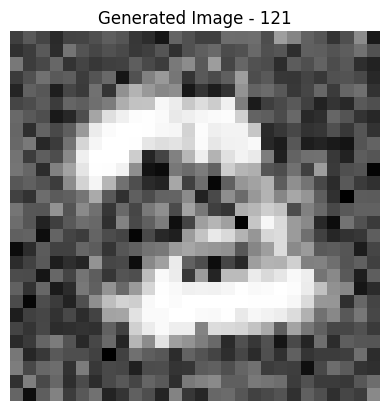

Epoch [121/150] | D Loss: 1.0388 | G Loss: 1.0478 | D steps: 3, G steps: 1


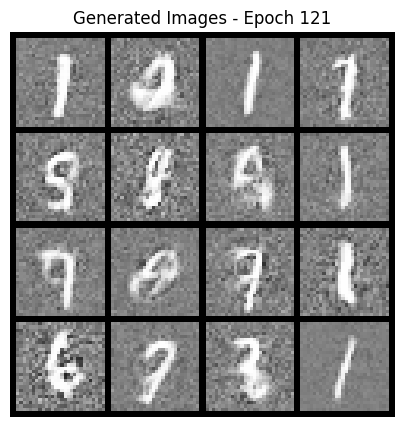

Epoch [122/150] | D Loss: 1.1496 | G Loss: 1.2473 | D steps: 3, G steps: 1
Epoch [123/150] | D Loss: 1.0433 | G Loss: 1.3136 | D steps: 3, G steps: 1
Epoch [124/150] | D Loss: 1.0410 | G Loss: 1.2031 | D steps: 3, G steps: 1
Epoch [125/150] | D Loss: 1.2203 | G Loss: 1.2523 | D steps: 3, G steps: 1
Epoch [126/150] | D Loss: 1.0496 | G Loss: 1.1702 | D steps: 3, G steps: 1
Epoch [127/150] | D Loss: 1.1197 | G Loss: 1.2761 | D steps: 3, G steps: 1
Epoch [128/150] | D Loss: 1.1348 | G Loss: 1.1114 | D steps: 3, G steps: 1
Epoch [129/150] | D Loss: 1.1411 | G Loss: 1.2177 | D steps: 3, G steps: 1
Epoch [130/150] | D Loss: 1.1230 | G Loss: 1.0662 | D steps: 3, G steps: 1


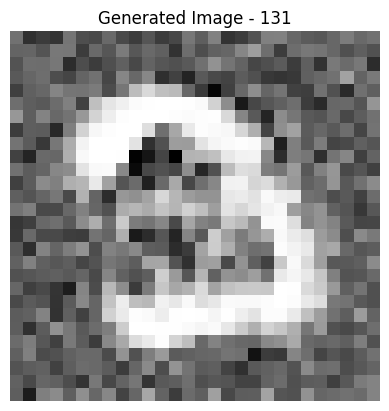

Epoch [131/150] | D Loss: 1.1123 | G Loss: 1.1100 | D steps: 3, G steps: 1


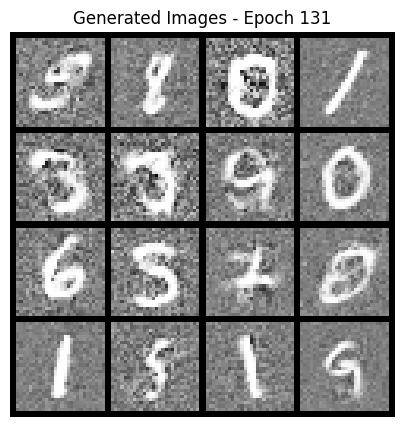

Epoch [132/150] | D Loss: 1.1277 | G Loss: 1.2627 | D steps: 3, G steps: 1
Epoch [133/150] | D Loss: 1.0567 | G Loss: 1.2063 | D steps: 3, G steps: 1
Epoch [134/150] | D Loss: 1.1474 | G Loss: 1.1291 | D steps: 3, G steps: 1
Epoch [135/150] | D Loss: 1.2249 | G Loss: 1.2136 | D steps: 3, G steps: 1
Epoch [136/150] | D Loss: 1.0626 | G Loss: 1.2311 | D steps: 3, G steps: 1
Epoch [137/150] | D Loss: 1.0121 | G Loss: 1.1794 | D steps: 3, G steps: 1
Epoch [138/150] | D Loss: 1.0471 | G Loss: 1.1769 | D steps: 3, G steps: 1
Epoch [139/150] | D Loss: 1.1349 | G Loss: 1.0766 | D steps: 3, G steps: 1
Epoch [140/150] | D Loss: 1.0615 | G Loss: 1.1030 | D steps: 3, G steps: 1


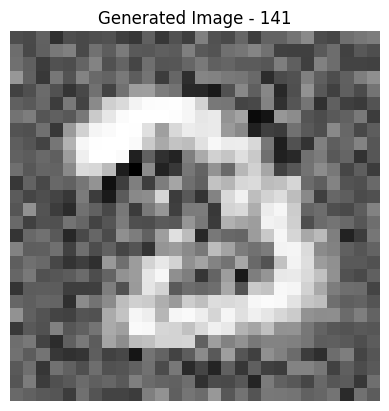

Epoch [141/150] | D Loss: 1.0894 | G Loss: 1.1922 | D steps: 3, G steps: 1


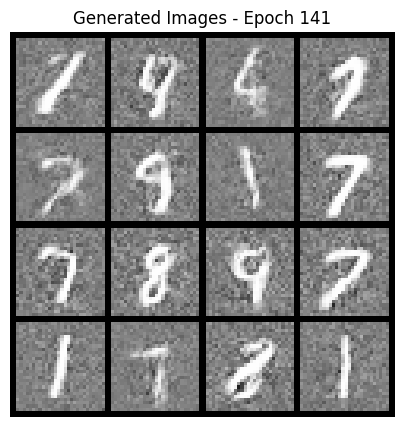

Epoch [142/150] | D Loss: 1.0575 | G Loss: 1.2419 | D steps: 3, G steps: 1
Epoch [143/150] | D Loss: 1.1383 | G Loss: 1.3021 | D steps: 3, G steps: 1
Epoch [144/150] | D Loss: 1.0749 | G Loss: 1.2602 | D steps: 3, G steps: 1
Epoch [145/150] | D Loss: 1.1956 | G Loss: 1.0746 | D steps: 3, G steps: 1
Epoch [146/150] | D Loss: 1.1254 | G Loss: 1.2067 | D steps: 3, G steps: 1
Epoch [147/150] | D Loss: 1.1623 | G Loss: 1.1397 | D steps: 3, G steps: 1
Epoch [148/150] | D Loss: 1.1570 | G Loss: 1.1767 | D steps: 3, G steps: 1
Epoch [149/150] | D Loss: 1.0952 | G Loss: 1.2528 | D steps: 3, G steps: 1
Epoch [150/150] | D Loss: 1.1484 | G Loss: 1.0124 | D steps: 3, G steps: 1


In [15]:
batch_size = 64
image_dim = 784
noise_dim = 100

train_dataloader = torch.utils.data.DataLoader(
    mnist_trainset,
    batch_size=batch_size,
    shuffle=True,
    pin_memory=True,
    num_workers=4
)
g_optimizer = torch.optim.Adam(generator.parameters(), lr=2e-4)
d_optimizer = torch.optim.Adam(discriminator.parameters(), lr=2e-4)
loss_fn = nn.BCEWithLogitsLoss()

os.makedirs('generated_images', exist_ok=True)

d_losses = []
g_losses = []

best_g_loss = float("inf")

#treshold = 30
num_epochs = 150
fixed_noise = torch.randn(1, noise_dim).to(device)
for epoch in range(num_epochs):
  if len(d_losses) > 0:
    last_d_loss = d_losses[-1]

    if last_d_loss < 0.5:
        d_steps = 1
        g_steps = 2
    elif last_d_loss > 1:
        d_steps = 3
        g_steps = 1
    else:
        d_steps = 1
        g_steps = 1
  else:
    d_steps = 3
    g_steps = 1


  #print every 10 epochs
  with torch.no_grad():
    generator.eval()
    fake_image = generator(fixed_noise).detach().cpu().squeeze()
  if epoch%10 == 0 or epoch == 0:
    fake_image = (fake_image + 1) / 2
    plt.imshow(fake_image.view(28, 28), cmap='gray')
    plt.title(f"Generated Image - {epoch+1}")
    plt.axis('off')
    plt.show()

  generator.train()
  for real_images,_ in train_dataloader:
    batch_size = real_images.size(0)
    real_images = real_images.view(batch_size, -1).to(device)

    ## Train discriminator
    for _ in range(d_steps):
      noise = torch.randn(batch_size, noise_dim).to(device)
      fake_images = generator(noise)

      # Labels
      fake_labels = torch.rand(batch_size, 1) * 0.3
      fake_labels = fake_labels.to(device)
      real_labels = torch.rand(batch_size, 1) * 0.3 + 0.7
      real_labels = real_labels.to(device)

      # outputs
      outputs_fake = discriminator(fake_images.detach())
        # GPT explaination :"Hey, those fake_images, you just use them to
        # the discriminator loss. Don't propagate the gradients in the generator
      outputs_real = discriminator(real_images)

      # compute the loss
      d_loss_fake = loss_fn(outputs_fake, fake_labels)
      d_loss_real = loss_fn(outputs_real, real_labels)
      d_loss = d_loss_fake + d_loss_real

      if d_loss.item() >= 0.1:
        d_optimizer.zero_grad()
        d_loss.backward()
        d_optimizer.step()
      else:
        print("Discriminator too strong, skipping D step this batch.")

    ## Train generator
    for _ in range(g_steps):
      noise = torch.randn(batch_size, noise_dim).to(device)
      fake_images = generator(noise)
      outputs = discriminator(fake_images)

      real_labels_g = torch.rand(batch_size, 1) * 0.2 + 0.8
      real_labels_g = real_labels_g.to(device)

      g_loss = loss_fn(outputs, real_labels_g)

      # backpropagation
      g_optimizer.zero_grad()
      g_loss.backward()

      if g_loss.item() < best_g_loss:
        best_g_loss = g_loss.item()
        torch.save(generator.state_dict(), "best_generator.pth")

      g_optimizer.step()

  d_losses.append(d_loss.item())
  g_losses.append(g_loss.item())
  print(f"Epoch [{epoch+1}/{num_epochs}] | D Loss: {d_loss.item():.4f} | G Loss: {g_loss.item():.4f} | D steps: {d_steps}, G steps: {g_steps}")

  if epoch%10 == 0 or epoch == 0:
    with torch.no_grad():
      generator.eval()
      sample_noise = torch.randn(16, noise_dim).to(device)
      fake_batch = generator(sample_noise)
      fake_batch = fake_batch.view(-1, 1, 28, 28)  # (B, C, H, W)
      fake_batch = (fake_batch + 1) / 2
      grid = torchvision.utils.make_grid(fake_batch, nrow=4)
      plt.figure(figsize=(5,5))
      plt.imshow(grid.permute(1, 2, 0).squeeze().cpu(), cmap='gray')
      plt.axis('off')
      plt.title(f"Generated Images - Epoch {epoch+1}")
      plt.show()
      generator.train()


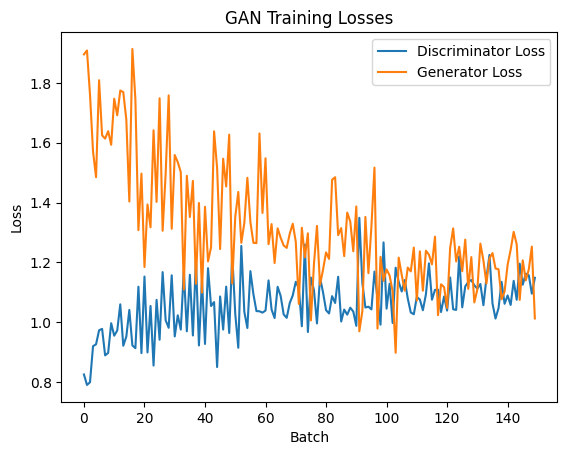

In [16]:
plt.plot(np.array(d_losses), label="Discriminator Loss")
plt.plot(np.array(g_losses), label="Generator Loss")
plt.legend()
plt.title("GAN Training Losses")
plt.xlabel("Batch")
plt.ylabel("Loss")
plt.show()

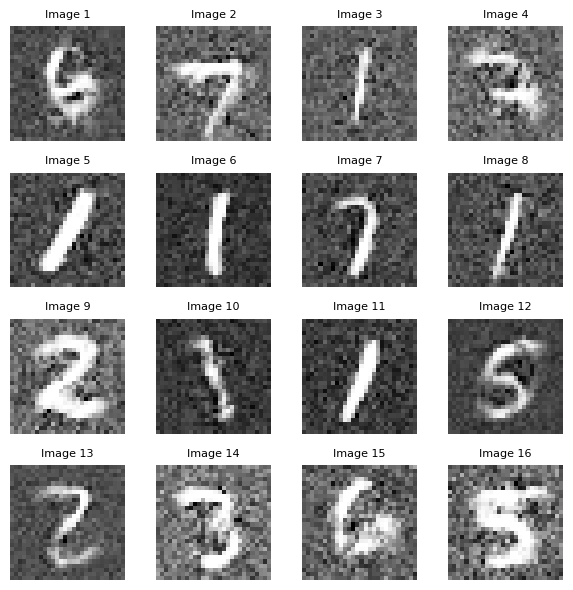

In [18]:
# Test
generator.eval()
noise = torch.randn(16, noise_dim).to(device)
fake_images = generator(noise).view(-1, 28, 28).detach().cpu()
fake_images = (fake_images + 1) / 2

fig, axes = plt.subplots(4, 4, figsize=(6, 6))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(fake_images[i], cmap="gray")
    ax.set_title(f"Image {i+1}", fontsize=8)
    ax.axis("off")

plt.tight_layout()
plt.show()
#generator.train()